## <center>Partitioning: Divide and Conquer</center>
### <center> Linh B. Ngo </center>
### <center> CPSC 3620 </center>

In [5]:
import ipyparallel
c=ipyparallel.Client(profile="mpicluster")
print(c.ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


#### <center> Partitioning </center>

Partitioning simply divides the problem into parts and then compute the parts and combine results

- The basis of all parallel programming, in one form or another. 

- Pleasantly parallel used partitioning without any interaction between the parts.

- Most partitioning  formulation require the results of the parts to be combined to obtain the desired results. 

- Partitioning can be applied to the program data. This is call data partitioning or domain decomposition.

- Partitioning can also be applied to the functions of a program. This is called functional decomposition. 

#### <center> Divide and Conquer </center>

- Characterized by dividing problem into sub-problems of same form as larger problem. Further divisions into still smaller sub-problems, usually done by recursion.

- Recursive divide and conquer amenable to parallelization because separate processes can be used for divided pairs. Also usually data is naturally localized.

In [2]:
def visualize_dc():
    from graphviz import Digraph
    dot = Digraph(comment='Divide and Conquer')

    dot.node('P0-0', ' ')
    dot.node('P0-1', ' ')
    dot.node('P1-1', ' ')
    dot.node('P0-2', ' ')
    dot.node('P1-2', ' ')
    dot.node('P2-2', ' ')
    dot.node('P3-2', ' ')
    dot.node('P0-3', ' ')
    dot.node('P1-3', ' ')
    dot.node('P2-3', ' ')
    dot.node('P3-3', ' ')
    dot.node('P4-3', ' ')
    dot.node('P5-3', ' ')
    dot.node('P6-3', ' ')
    dot.node('P7-3', ' ')

    dot.edge('P0-0','P0-1')
    dot.edge('P0-0','P1-1')

    dot.edge('P0-1','P0-2')
    dot.edge('P0-1','P2-2')
    dot.edge('P1-1','P1-2')
    dot.edge('P1-1','P3-2')

    dot.edge('P0-2','P0-3')
    dot.edge('P0-2','P4-3')
    dot.edge('P1-2','P1-3')
    dot.edge('P1-2','P5-3')
    dot.edge('P2-2','P2-3')
    dot.edge('P2-2','P6-3')
    dot.edge('P3-2','P3-3')
    dot.edge('P3-2','P7-3')
    return dot

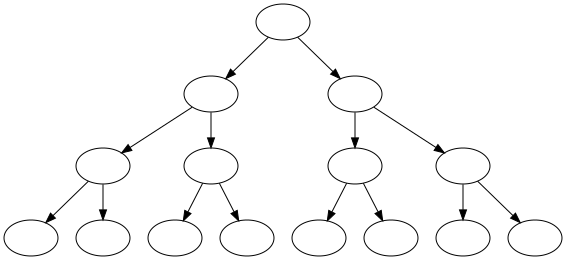

In [3]:
visualize_dc()

In [4]:
def visualize_dc_v1():
    from graphviz import Digraph
    dot = Digraph(comment='Divide and Conquer')

    dot.node('P0-0', 'P0')
    dot.node('P0-1', 'P0')
    dot.node('P1-1', 'P1')
    dot.node('P0-2', 'P0')
    dot.node('P1-2', 'P1')
    dot.node('P2-2', 'P2')
    dot.node('P3-2', 'P3')
    dot.node('P0-3', 'P0')
    dot.node('P1-3', 'P1')
    dot.node('P2-3', 'P2')
    dot.node('P3-3', 'P3')
    dot.node('P4-3', 'P4')
    dot.node('P5-3', 'P5')
    dot.node('P6-3', 'P6')
    dot.node('P7-3', 'P7')

    dot.edge('P0-0','P0-1')
    dot.edge('P0-0','P1-1', color="red")

    dot.edge('P0-1','P0-2')
    dot.edge('P0-1','P2-2', color="red")
    dot.edge('P1-1','P1-2')
    dot.edge('P1-1','P3-2', color="red")

    dot.edge('P0-2','P0-3')
    dot.edge('P0-2','P4-3', color="red")
    dot.edge('P1-2','P1-3')
    dot.edge('P1-2','P5-3', color="red")
    dot.edge('P2-2','P2-3')
    dot.edge('P2-2','P6-3', color="red")
    dot.edge('P3-2','P3-3')
    dot.edge('P3-2','P7-3', color="red")
    return dot

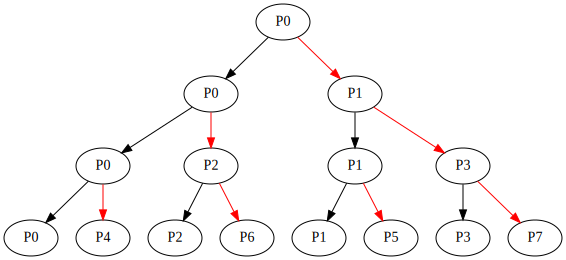

In [5]:
visualize_dc_v1()

In [12]:
%%px
from mpi4py import MPI
import math
comm = MPI.COMM_WORLD
rank = comm.Get_rank(); size = comm.Get_size()
print ("This stdout is process %s" % (rank))
for i in range(0, int(math.log2(size))):
    print (i)
    distance = int(math.pow(2, i))
    if ( rank < int(math.pow(2, i)) ):
        print ("Sender ", rank, " sends to ", rank + distance)
    if (rank >= int(math.pow(2, i)) and rank < int(math.pow(2,i+1))):
        print ("Receiver ", rank, "receives from ", rank - distance)
    #am I sender or receiver?
    # who am I sending/receiving to/from?    

[stdout:0] 
This stdout is process 4
0
1
2
Receiver  4 receives from  0
[stdout:1] 
This stdout is process 0
0
Sender  0  sends to  1
1
Sender  0  sends to  2
2
Sender  0  sends to  4
[stdout:2] 
This stdout is process 2
0
1
Receiver  2 receives from  0
2
Sender  2  sends to  6
[stdout:3] 
This stdout is process 6
0
1
2
Receiver  6 receives from  2
[stdout:4] 
This stdout is process 1
0
Receiver  1 receives from  0
1
Sender  1  sends to  3
2
Sender  1  sends to  5
[stdout:5] 
This stdout is process 5
0
1
2
Receiver  5 receives from  1
[stdout:6] 
This stdout is process 3
0
1
Receiver  3 receives from  1
2
Sender  3  sends to  7
[stdout:7] 
This stdout is process 7
0
1
2
Receiver  7 receives from  3


In [5]:
def visualize_dc_v2():
    from graphviz import Digraph
    dot = Digraph(comment='Divide and Conquer')

    dot.node('P0-0', 'P0')
    dot.node('P0-1', 'P0')
    dot.node('P1-1', 'P1')
    dot.node('P0-2', 'P0')
    dot.node('P1-2', 'P1')
    dot.node('P2-2', 'P2')
    dot.node('P3-2', 'P3')
    dot.node('P0-3', 'P0')
    dot.node('P1-3', 'P1')
    dot.node('P2-3', 'P2')
    dot.node('P3-3', 'P3')
    dot.node('P4-3', 'P4')
    dot.node('P5-3', 'P5')
    dot.node('P6-3', 'P6')
    dot.node('P7-3', 'P7')

    dot.edge('P0-0','P0-1')
    dot.edge('P0-0','P1-1', color="red", label = "N/2")

    dot.edge('P0-1','P0-2')
    dot.edge('P0-1','P2-2', color="red", label = "N/4")
    dot.edge('P1-1','P1-2')
    dot.edge('P1-1','P3-2', color="red", label = "N/4")

    dot.edge('P0-2','P0-3')
    dot.edge('P0-2','P4-3', color="red", label = "N/8")
    dot.edge('P1-2','P1-3')
    dot.edge('P1-2','P5-3', color="red", label = "N/8")
    dot.edge('P2-2','P2-3')
    dot.edge('P2-2','P6-3', color="red", label = "N/8")
    dot.edge('P3-2','P3-3')
    dot.edge('P3-2','P7-3', color="red", label = "N/8")
    return dot

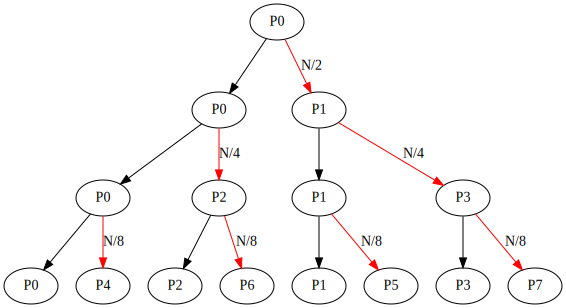

In [6]:
visualize_dc_v2()

In [7]:
def visualize_dc_v3():
    from graphviz import Digraph
    dot = Digraph(comment='Divide and Conquer')
    
    dot.node('P0-3', 'P0')
    dot.node('P1-3', 'P1')
    dot.node('P2-3', 'P2')
    dot.node('P3-3', 'P3')
    dot.node('P4-3', 'P4')
    dot.node('P5-3', 'P5')
    dot.node('P6-3', 'P6')
    dot.node('P7-3', 'P7')
    
    dot.node('P0-2', 'P0')
    dot.node('P1-2', 'P1')
    dot.node('P2-2', 'P2')
    dot.node('P3-2', 'P3')
    
    dot.node('P0-1', 'P0')
    dot.node('P1-1', 'P1')
    dot.node('P0-0', 'P0')



    dot.edge('P0-3','P0-2')
    dot.edge('P4-3','P0-2', color="red")
    dot.edge('P1-3','P1-2')
    dot.edge('P5-3','P1-2', color="red")
    dot.edge('P2-3','P2-2')
    dot.edge('P6-3','P2-2', color="red")
    dot.edge('P3-3','P3-2')
    dot.edge('P7-3','P3-2', color="red")

    dot.edge('P0-2','P0-1')
    dot.edge('P2-2','P0-1', color="red")
    dot.edge('P1-2','P1-1')
    dot.edge('P3-2','P1-1', color="red")
    
    dot.edge('P0-1','P0-0')
    dot.edge('P1-1','P0-0', color="red")

    return dot

In [13]:
visualize_dc_v3()

NameError: name 'visualize_dc_v3' is not defined

**Many sorting algorithms can be parallelized by partitioning using
divide and conquer**

#### <center> Bucket Sort </center>

- Sequential sorting time complexity: $O(nlog(n/m))$
- Works well if the original numbers uniformly distributed across a known interval, say 0 to a - 1.


<center> <img src="pictures/bucketsort1.png" width="700"/> 
<sub>Wilkinson, Barry, and Michael Allen. Parallel programming. 2nd Ed. 2003. </sub>
</center>

** Simple approach to parallel bucket sort **

<center> <img src="pictures/bucketsort2.png" width="700"/> 
<sub>Wilkinson, Barry, and Michael Allen. Parallel programming. 2nd Ed. 2003. </sub>
</center>

- Bcast data
- Sort only those elements that fit in local interval bucket (determined by rank)
- Gather sorted bucket

**Uppercase collective: MPI.Scatterv**

Comm.Scatterv([sendbuf, tuple_int sendcounts, tuple_int displacements, MPI_Datatype sendtype], recvbuf, root=0)

Parameters:	
- Comm (MPI comm) – communicator across which to scatter
- sendbuf (choice) – buffer
- sendcounts (tuple_int) – number of elements to send to each process (one integer for each process)
- displacements (tuple_int) – number of elements away from the first element in the array at which to begin the new, segmented array
- sendtype (MPI_Datatype) – MPI datatype of the buffer being sent (choice of sendbuf)
- recvbuf (choice) – buffer in which to receive the sendbuf
- root (int) – process from which to scatter

In [18]:
%%px
# Run with 3 processes
import numpy
from mpi4py import MPI
comm = MPI.COMM_WORLD; rank = comm.Get_rank()
if rank == 0:
    x = numpy.linspace(0,100,11)
    print (x)
else:
    x = None
if rank == 2:
    xlocal = numpy.zeros(9)
else:
    xlocal = numpy.zeros(1)
comm.Scatterv([x,(1,1,9),(0,1,1),MPI.DOUBLE],xlocal)
print ("process " + str(rank) + " has " +str(xlocal))
if (rank == 0):
    print(x)

[stdout:0] 
[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
process 0 has [ 0.]
[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
[stdout:1] process 2 has [ 10.  20.  30.  40.  50.  60.  70.  80.  90.]
[stdout:2] process 1 has [ 10.]


**Uppercase collective: MPI.Gatherv**

Comm.Gatherv(sendbuf, [recvbuf, tuple_int sendcounts, tuple_int displacements, MPI_Datatype sendtype], root=0)

Parameters:	
- Comm (MPI comm) – communicator across which to scatter
- sendbuf (choice) – buffer
- recvbuf (choice) – buffer in which to receive the sendbuf
- sendcounts (tuple_int) – number of elements to receive from each process (one integer for each process)
- displacements (tuple_int) – number of elements away from the first element in the receiving array at which to begin appending the segmented array
- sendtype (MPI_Datatype) – MPI datatype of the buffer being sent (choice of sendbuf)
- root (int) – process from which to scatter

In [21]:
%%px
# Run with 3 processes
import numpy
from mpi4py import MPI
comm = MPI.COMM_WORLD; rank = comm.Get_rank()
if rank == 0:
    x = numpy.linspace(0,100,11)
else:
    x = None
if rank == 2:
    xlocal = numpy.zeros(9)
else:
    xlocal = numpy.zeros(1)
comm.Scatterv([x,(1,1,9),(0,1,2),MPI.DOUBLE],xlocal); comm.Barrier()
if rank == 0:
    xGathered = numpy.zeros(11)
else:
    xGathered = None
comm.Gatherv(xlocal,[xGathered,(1,1,9),(0,1,1),MPI.DOUBLE])
print (xlocal); print ("process " + str(rank) + " has " +str(xGathered))

[stdout:0] 
[ 0.]
process 0 has [   0.   20.   30.   40.   50.   60.   70.   80.   90.  100.    0.]
[stdout:1] 
[  20.   30.   40.   50.   60.   70.   80.   90.  100.]
process 2 has None
[stdout:2] 
[ 10.]
process 1 has None


**Parallel Bucket Sort version 1**

In [1]:
import ipyparallel
c=ipyparallel.Client(profile="mpicluster")
print(c.ids)

[0, 1, 2, 3]


In [6]:
%%px
import numpy as np
from mpi4py import MPI
comm = MPI.COMM_WORLD

rank = comm.Get_rank(); size = comm.Get_size(); N = 16

unsorted = np.zeros(N, dtype="int")
final_sorted = np.zeros(N, dtype="int")

if rank == 0:
    unsorted = np.random.randint(low=0,high=N,size=N)
    
comm.Bcast(unsorted)
local_min = rank * N / size
local_max = (rank + 1) * N / size

#generic form:
# local_min = rank * (b - a) / size
# local_max = (rank + 1) * (b - a) / size

print(rank, local_min, local_max)

local_bucket = unsorted[np.logical_and(unsorted >= local_min, unsorted < local_max)]
local_sorted = np.sort(local_bucket)

arr_sendcount = np.zeros(size, dtype="int")
sendcount = np.array([local_sorted.size], dtype="int")

comm.Gather(sendcount, arr_sendcount, root=0)
comm.Bcast(arr_sendcount, root = 0)

dispcount = np.zeros(size, dtype="int")
dispcount[0] = 0
for i in range(1,size):
    dispcount[i] = dispcount[i-1] + arr_sendcount[i-1]
    
comm.Gatherv(local_sorted, [final_sorted, tuple(arr_sendcount), tuple(dispcount), MPI.DOUBLE])

if (rank == 0):
    print (unsorted)
    print (final_sorted)
print(local_bucket)
print(local_sorted)

[stdout:0] 
2 8.0 12.0
[11 11  8  8]
[ 8  8 11 11]
[stdout:1] 
0 0.0 4.0
[13  5  7  5 11 11  8  5  8 12 13  1 14  0  4 12]
[ 0  1  4  5  5  5  7  8  8 11 11 12 12 13 13 14]
[1 0]
[0 1]
[stdout:2] 
3 12.0 16.0
[13 12 13 14 12]
[12 12 13 13 14]
[stdout:3] 
1 4.0 8.0
[5 7 5 5 4]
[4 5 5 5 7]


<center> <img src="pictures/bucketsort3.png" width="700"/> 
<sub>Wilkinson, Barry, and Michael Allen. Parallel programming. 2nd Ed. 2003. </sub>
</center>

**Uppercase collective: MPI.Alltoallv**

Comm.Alltoallv([sendbuf, tuple_int sendcounts, tuple_int displacements, MPI_Datatype sendtype],[recvbuf, tuple_int recvcounts, tuple_int displacements, MPI_Datatype sendtype])

Parameters:	
- Comm (MPI comm) – communicator across which to scatter
- sendbuf (choice) – buffer
- recvbuf (choice) – buffer in which to receive the sendbuf
- sendcounts (tuple_int) – number of elements to send to each process (one integer for each process)
- displacements (tuple_int) – number of elements away from the first element in the sending array at which to begin sending the segmented array
- sendtype (MPI_Datatype) – MPI datatype of the buffer being sent (choice of sendbuf)
- recvcounts (tuple_int) – number of elements to receive from each process (one integer for each process)
- displacements (tuple_int) – number of elements away from the first element in the receiving array at which to begin appending the segmented array
- sendtype (MPI_Datatype) – MPI datatype of the buffer being receive (choice of recvbuf)

In [7]:
import ipyparallel
c=ipyparallel.Client(profile="mpicluster")
print(c.ids)

[0, 1, 2, 3]


In [16]:
%%px
import numpy
import random
from mpi4py import MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank(); size = comm.Get_size(); N = 8
local_array = numpy.random.randint(low = 0, high = N, size = N)
print("Rank ", rank, ": ", local_array)
#stackoverflow
def constrained_sum_sample_pos(n, total):
    dividers = sorted(random.sample(range(1, total), n - 1))
    return [a - b for a, b in zip(dividers + [total], [0] + dividers)]
sendcount = numpy.array(constrained_sum_sample_pos(size, N), dtype="int")
dispcount = numpy.zeros(size, dtype="int")
dispcount[0] = 0
for i in range(1,size):
    dispcount[i] = dispcount[i-1] + sendcount[i-1]    
print (sendcount)
print (dispcount)
recvcount = numpy.zeros(size, dtype="int")
comm.Alltoall(sendcount, recvcount)
print(recvcount)
disprecv = numpy.zeros(size, dtype="int")
disprecv[0] = 0
for i in range(1,size):
    disprecv[i] = disprecv[i-1] + recvcount[i-1]   
print(disprecv)
new_array = numpy.zeros(numpy.sum(recvcount), dtype="int")
comm.Alltoallv([local_array,tuple(sendcount),tuple(dispcount),MPI.DOUBLE],
               [new_array, tuple(recvcount), tuple(disprecv), MPI.DOUBLE])
print (new_array)
#print (local_array)

[stdout:0] 
Rank  2 :  [1 1 4 3 2 2 2 4]
[1 1 4 2]
[0 1 2 6]
[3 1 4 5]
[0 3 4 8]
[6 5 1 4 4 3 2 2 3 1 6 5 1]
[stdout:1] 
Rank  0 :  [5 7 7 6 5 1 6 3]
[2 1 3 2]
[0 2 3 6]
[2 2 1 1]
[0 2 4 5]
[5 7 2 6 1 4]
[stdout:2] 
Rank  3 :  [4 4 3 1 6 5 1 3]
[1 1 5 1]
[0 1 2 7]
[2 4 2 1]
[0 2 6 8]
[6 3 0 1 1 5 2 4 3]
[stdout:3] 
Rank  1 :  [2 6 2 4 0 1 1 5]
[2 1 1 4]
[0 2 3 4]
[1 1 1 1]
[0 1 2 3]
[7 2 1 4]


In [10]:
%%px
import numpy as np
from mpi4py import MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank(); size = comm.Get_size(); N = 16
unsorted = None
local_unsorted = np.zeros(int(N / size), dtype="int")
final_sorted = np.zeros(N, dtype="int")
if rank == 0:
    unsorted = np.random.randint(low=0,high=N,size=N)
    print ("Original unsorted data at process", rank, ": ", unsorted)
comm.Scatter(unsorted, local_unsorted, root = 0)
print ("Scattered data at process ", rank, ": ", local_unsorted)

local_buckets = np.full(shape=(int(N/size), size), fill_value=-1, dtype="int")
sendcount = np.zeros(size, dtype="int")
local_unsorted_bucketed = np.zeros(int(N / size), dtype="int")
count = 0
for i in range(0, size):    
    for j in range (0, local_unsorted.size):
        local_min = i * N/size
        local_max = (i + 1) * N / size  
        if ((local_unsorted[j] >= local_min) and (local_unsorted[j] < local_max)):
            local_buckets[i][sendcount[i]] = local_unsorted[j]
            sendcount[i] += 1
    if (sendcount[i] > 0):
        local_unsorted_bucketed[count:count + sendcount[i]] = local_buckets[i, 0:sendcount[i]]
        print ("Local_unsorted_bucketed at process ", rank, ": ", local_unsorted_bucketed)
        count += sendcount[i]

print ("Sendcount at process ", rank, ": ", sendcount)
print ("Bucket matrix at process ", rank, ": \n", local_buckets)

dispcount = numpy.zeros(size, dtype="int")
dispcount[0] = 0
for i in range(1,size):
    dispcount[i] = dispcount[i-1] + sendcount[i-1]    
#print (sendcount)
#print (dispcount)
recvcount = numpy.zeros(size, dtype="int")
comm.Alltoall(sendcount, recvcount)
print(recvcount)
disprecv = numpy.zeros(size, dtype="int")
disprecv[0] = 0
for i in range(1,size):
    disprecv[i] = disprecv[i-1] + recvcount[i-1]   
print(disprecv)
single_unsorted_bucket = numpy.zeros(numpy.sum(recvcount), dtype="int")
comm.Alltoallv([local_unsorted_bucketed,tuple(sendcount),tuple(dispcount),MPI.DOUBLE],
               [single_unsorted_bucket, tuple(recvcount), tuple(disprecv), MPI.DOUBLE])
print (single_unsorted_bucket)
local_sorted = np.sort(single_unsorted_bucket)
arr_sendcount = np.zeros(size, dtype="int")
sendcount = np.array([local_sorted.size], dtype="int")
comm.Gather(sendcount, arr_sendcount, root=0)
comm.Bcast(arr_sendcount, root = 0)
dispcount = np.zeros(size, dtype="int")
dispcount[0] = 0
for i in range(1,size):
    dispcount[i] = dispcount[i-1] + arr_sendcount[i-1]
comm.Gatherv(local_sorted, [final_sorted, tuple(arr_sendcount), tuple(dispcount), MPI.DOUBLE])
if (rank == 0):
    print (final_sorted)

[stdout:0] 
Scattered data at process  2 :  [ 2  8 15 10]
Local_unsorted_bucketed at process  2 :  [2 0 0 0]
Local_unsorted_bucketed at process  2 :  [ 2  8 10  0]
Local_unsorted_bucketed at process  2 :  [ 2  8 10 15]
Sendcount at process  2 :  [1 0 2 1]
Bucket matrix at process  2 : 
 [[ 2 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 8 10 -1 -1]
 [15 -1 -1 -1]]
[0 2 5 7]
[ 8  8  9  9 11  8 10  9]
[stdout:1] 
Original unsorted data at process 0 :  [ 8  6  8 12  6  9  9 11  2  8 15 10 15  9 15  3]
Scattered data at process  0 :  [ 8  6  8 12]
Local_unsorted_bucketed at process  0 :  [6 0 0 0]
Local_unsorted_bucketed at process  0 :  [6 8 8 0]
Local_unsorted_bucketed at process  0 :  [ 6  8  8 12]
Sendcount at process  0 :  [0 1 2 1]
Bucket matrix at process  0 : 
 [[-1 -1 -1 -1]
 [ 6 -1 -1 -1]
 [ 8  8 -1 -1]
 [12 -1 -1 -1]]
[0 0 0 1]
[2 3]
[ 2  3  6  6  8  8  8  9  9  9 10 11 12 15 15 15]
[stdout:2] 
Scattered data at process  3 :  [15  9 15  3]
Local_unsorted_bucketed at process  3 :  [3 0 0 0]
Local_